In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import mixture
from sklearn.decomposition import PCA

first we load our data

In [81]:
digits = load_digits()
y=digits.target
x=digits.data


We define a function called "fit_models" that generates a list of guassian mixture models that are made with n components. n varries from 50 to 250 with step of 10. It retyrns list of models and the arrey of number of components

In [96]:
def fit_models(x):
    n_components = np.arange(50, 250, 10)
    models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]
    return models,n_components


We define a function called "plot_aic" that calculates that gets the list of gmm models,number of model components, and the data.It calculates the AIC metric for each model, plots the AIC metrics based on bumber of components. It also finds the minimum AIC metric returns the best nummber of components

In [83]:
def plot_aic(x,models,n_components):
    plt.plot(n_components, [m.aic(x) for m in models], label='AIC')
    plt.xlabel('n_components')
    plt.title("AIC plot for N components")
    comp_aic_dict = dict(zip(n_components, [m.aic(x) for m in models]))
    best_num_comp = min(comp_aic_dict, key=comp_aic_dict.get)
    min_aic=comp_aic_dict[best_num_comp]
    print("best number of components: ",best_num_comp,"corresponding AIC: ",min_aic)
    return best_num_comp


We define a function called "plot_digits" that gets our data and plots 100 images

In [85]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

#A

Now we create our models, plot the AIC metrics, and find the best number of components

best number of components:  110 corresponding AIC:  -341389.51219843095


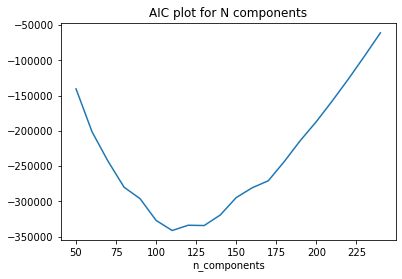

In [106]:
models,n_components=fit_models(x)
best_num_comp=plot_aic(x,models,n_components)

#B

Then we create a GMM model with 110 components and chek if the model is converged

In [98]:
gmm = mixture.GaussianMixture(best_num_comp, covariance_type='full', random_state=0)
gmm.fit(x)
print(gmm.converged_)

True


As we saw the model has converged

Now that we estimated our distribution, we generate new samples and plot the images

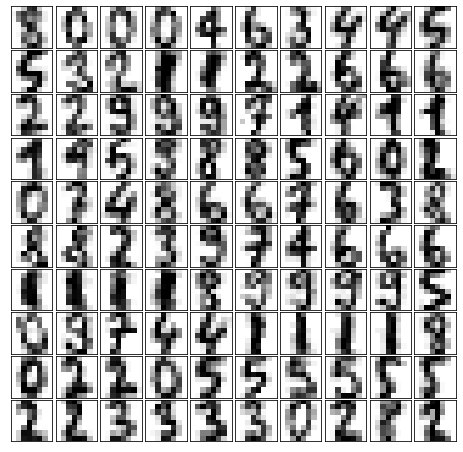

In [100]:
data_new = gmm.sample(100)
x_new=data_new[0]
y_new=data_new[1]
plot_digits(x_new)

#C

First we use a PCA dimension reduction that variance is 0.99

In [105]:
pca = PCA(0.99, whiten=True)
x_pca = pca.fit_transform(x)
print("number of dimensions with 0.99 variance: ",x_pca.shape[1])

number of dimensions with 0.99 variance:  41


Then we repeat part A and B 

best number of components:  140 corresponding AIC:  -236054.51913013693


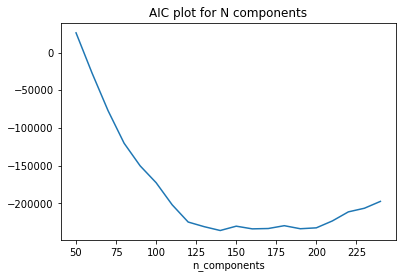

In [102]:
models,n_components=fit_models(x_pca)
best_num_comp=plot_aic(x_pca,models,n_components)


As we can see, we need more components (140>110)

In [103]:
gmm_pc = mixture.GaussianMixture(best_num_comp, covariance_type='full', random_state=0)
gmm.fit(x_pca)
print(gmm.converged_)

True


As we saw the model has converged

Now that we estimated our distribution, we generate new samples and plot the images

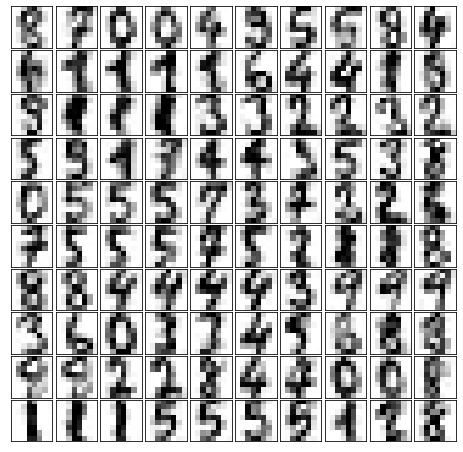

In [104]:
data_new = gmm.sample(100)
x_new=data_new[0]
y_new=data_new[1]
digits_new = pca.inverse_transform(x_new)
plot_digits(digits_new)

#D

By using PCA, since we reduced the dimensions,we reduced time complexity and simplified the calculations and the result had good accuracy